# Task
Analyze the data in the file "/content/drive/MyDrive/Colab Notebooks/ECS_VeriBilimi_25H/tip.csv" in detail.

## Veriyi yükleme

### Subtask:
"/content/drive/MyDrive/Colab Notebooks/ECS_VeriBilimi_25H/tip.csv" dosyasını bir pandas DataFrame'e yükleyin.


**Reasoning**:
Import pandas and load the data into a pandas DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ECS_VeriBilimi_25H/tip.csv')

**Reasoning**:
Display the first few rows of the DataFrame to verify the data loading.



In [2]:
display(df.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Veriyi keşfetme

### Subtask:
Veri setinin temel bilgilerini görüntüleyin (sütunlar, veri tipleri, eksik değerler, istatistiksel özetler).


**Reasoning**:
Display basic information about the DataFrame, including column names, data types, and non-null values using `df.info()`.



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


**Reasoning**:
Check for missing values in each column of the DataFrame using `df.isnull().sum()`.



In [4]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


**Reasoning**:
Display statistical summaries for numerical columns using `df.describe()`.



In [6]:
display(df.describe())

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


**Reasoning**:
Display the value counts for categorical columns using `df.value_counts()`.



In [8]:
print("Value counts for 'sex':")
display(df['sex'].value_counts())
print("\nValue counts for 'smoker':")
display(df['smoker'].value_counts())
print("\nValue counts for 'day':")
display(df['day'].value_counts())
print("\nValue counts for 'time':")
display(df['time'].value_counts())

Value counts for 'sex':


,count
sex,
Male,157
Female,87



Value counts for 'smoker':


,count
smoker,
No,151
Yes,93



Value counts for 'day':


,count
day,
Sat,87
Sun,76
Thur,62
Fri,19



Value counts for 'time':


,count
time,
Dinner,176
Lunch,68


## Veri temizleme (gerekirse)

### Subtask:
Eksik değerleri ele alın, aykırı değerleri belirleyin ve veri tiplerini düzenleyin.


**Reasoning**:
Based on the previous `df.isnull().sum()` output, there are no missing values, so step 1 is not required. I will now visualize the numerical columns to identify outliers using boxplots as instructed in step 2. I will then convert the categorical columns to the 'category' data type as instructed in step 4.



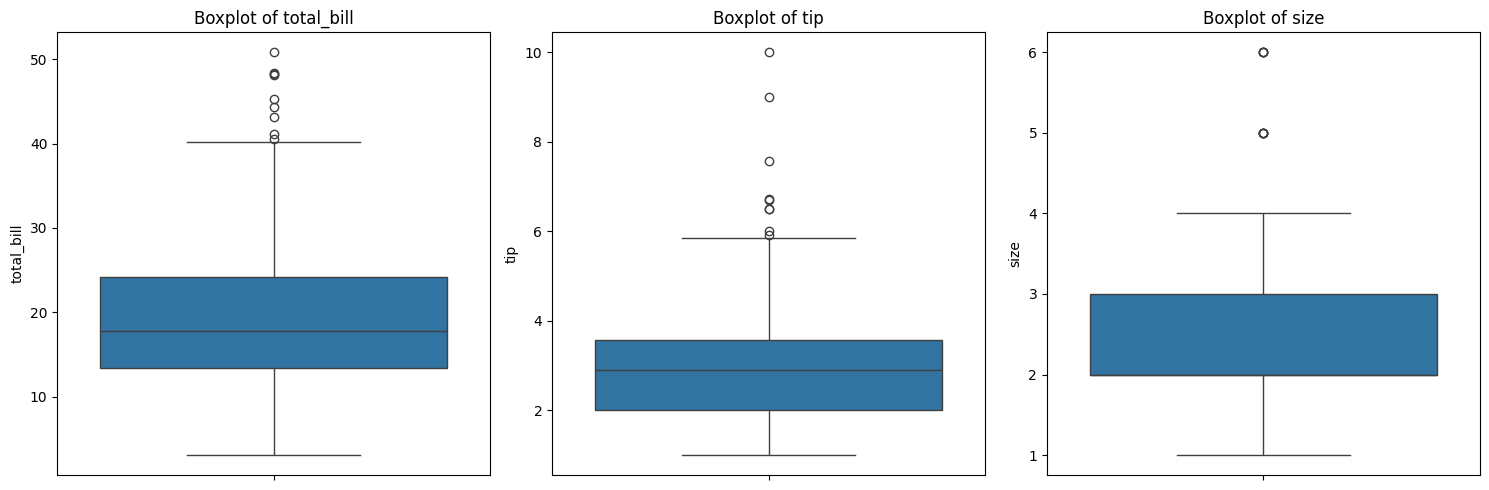

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize numerical columns for outliers
numerical_cols = ['total_bill', 'tip', 'size']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Convert categorical columns to 'category' dtype
categorical_cols = ['sex', 'smoker', 'day', 'time']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Display the updated data types
df.info()

## Keşifsel veri analizi (eda)

### Subtask:
Veri setindeki değişkenler arasındaki ilişkileri ve dağılımları inceleyin (görselleştirmeler dahil).


**Reasoning**:
Generate visualizations to explore the relationships and distributions of variables in the dataset as per the instructions.



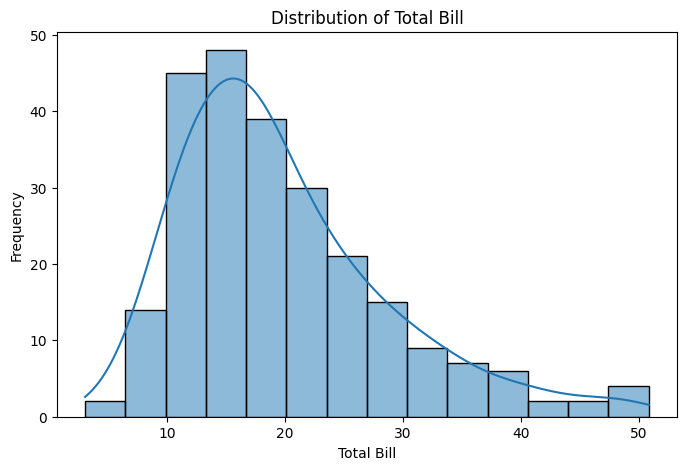

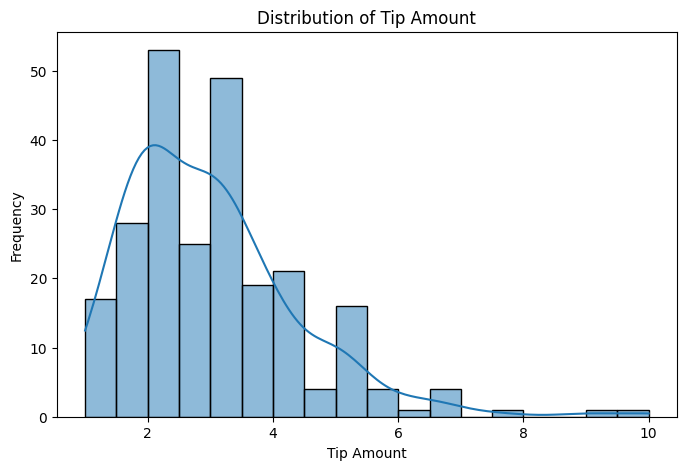

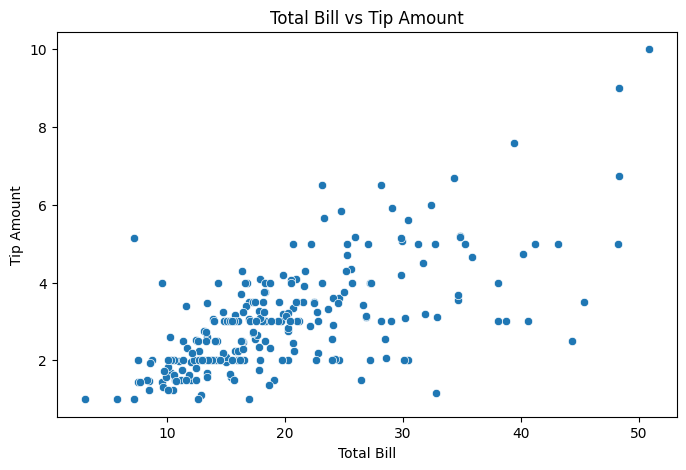

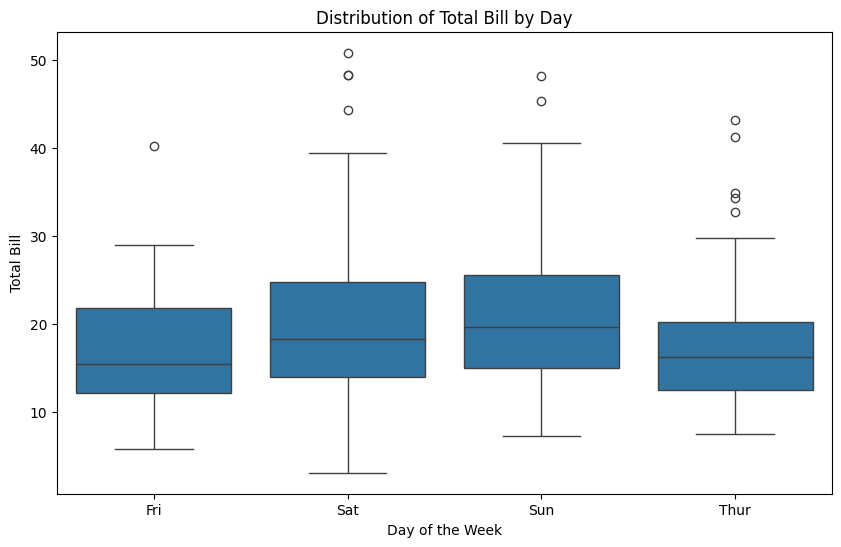

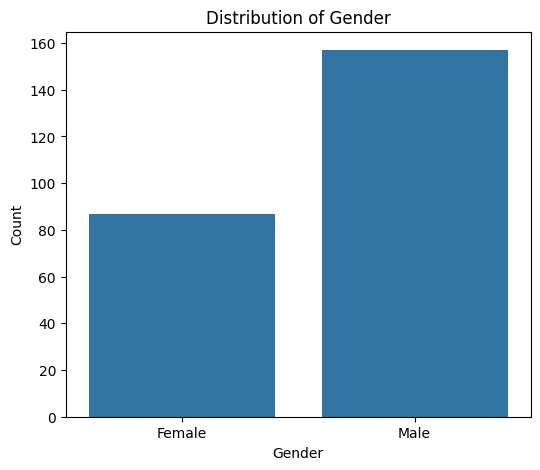

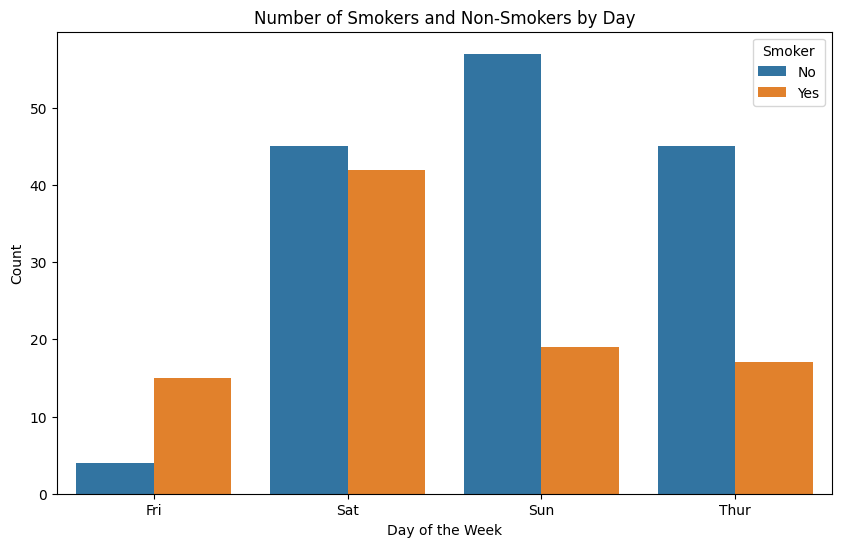

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram for 'total_bill'
plt.figure(figsize=(8, 5))
sns.histplot(df['total_bill'], kde=True)
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

# 2. Histogram for 'tip'
plt.figure(figsize=(8, 5))
sns.histplot(df['tip'], kde=True)
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.show()

# 3. Scatter plot of 'total_bill' vs 'tip'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Total Bill vs Tip Amount')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.show()

# 4. Box plot of 'total_bill' across 'day'
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='total_bill', data=df)
plt.title('Distribution of Total Bill by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bill')
plt.show()

# 5. Count plot for 'sex'
plt.figure(figsize=(6, 5))
sns.countplot(x='sex', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 6. Grouped bar plot for 'day' and 'smoker'
plt.figure(figsize=(10, 6))
sns.countplot(x='day', hue='smoker', data=df)
plt.title('Number of Smokers and Non-Smokers by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.show()

## Analiz yapma

### Subtask:
Belirli soruları yanıtlamak veya hipotezleri test etmek için veri üzerinde analizler yapın (örneğin, gruplara göre ortalamaları karşılaştırma, korelasyon analizi).


**Reasoning**:
Perform the requested analyses: calculate average tip for smokers/non-smokers, average total bill/tip per day, correlation matrix, and t-test for total bill by gender.



In [11]:
from scipy import stats

# 1. Average tip amount for smokers and non-smokers
avg_tip_smoker = df.groupby('smoker')['tip'].mean()
print("Average tip amount for smokers vs non-smokers:")
display(avg_tip_smoker)

# 2. Average total bill and tip amount for each day of the week
avg_bill_tip_per_day = df.groupby('day')[['total_bill', 'tip']].mean()
print("\nAverage total bill and tip amount per day:")
display(avg_bill_tip_per_day)

# 3. Correlation matrix for numerical columns
numerical_df = df[['total_bill', 'tip', 'size']]
correlation_matrix = numerical_df.corr()
print("\nCorrelation matrix for numerical columns:")
display(correlation_matrix)

# 4. T-test to compare the average total bill between male and female customers
male_bills = df[df['sex'] == 'Male']['total_bill']
female_bills = df[df['sex'] == 'Female']['total_bill']
t_stat, p_value = stats.ttest_ind(male_bills, female_bills)
print(f"\nT-test results for comparing average total bill between male and female:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the t-test result
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in the average total bill between male and female customers.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in the average total bill between male and female customers.")

Average tip amount for smokers vs non-smokers:


/tmp/ipython-input-11-799643968.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_smoker = df.groupby('smoker')['tip'].mean()


,tip
smoker,
No,2.991854
Yes,3.008710



Average total bill and tip amount per day:


/tmp/ipython-input-11-799643968.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_bill_tip_per_day = df.groupby('day')[['total_bill', 'tip']].mean()


,total_bill,tip
day,,
Fri,17.151579,2.734737
Sat,20.441379,2.993103
Sun,21.410000,3.255132
Thur,17.682742,2.771452



Correlation matrix for numerical columns:


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000



T-test results for comparing average total bill between male and female:
T-statistic: 2.2777940289803134
P-value: 0.0236116668468594
Conclusion: Reject the null hypothesis. There is a significant difference in the average total bill between male and female customers.


## Sonuçları yorumlama

### Subtask:
Analiz sonuçlarını yorumlayın ve bulguları özetleyin.


**Reasoning**:
Interpret the results from the previous analysis steps, including the average tips for smokers vs. non-smokers, average bill and tip per day, the correlation matrix, and the t-test for total bill by gender, and summarize the key findings.



In [13]:
print("Analysis Interpretation and Summary of Findings:")
print("\n1. Average Tip Amount for Smokers vs Non-Smokers:")
print(f"Based on the analysis, the average tip amount for smokers (${avg_tip_smoker['Yes']:.2f}) is very close to that of non-smokers (${avg_tip_smoker['No']:.2f}). The difference is minimal, suggesting that smoking status does not have a strong impact on the average tip amount in this dataset.")

print("\n2. Average Total Bill and Tip Amount per Day:")
print("The analysis of average total bill and tip amount per day shows a clear trend:")
display(avg_bill_tip_per_day)
print("Sundays have the highest average total bill and tip amount, followed by Saturdays. Thursdays and Fridays have considerably lower averages for both total bill and tip. This suggests that weekend days, particularly Sunday and Saturday, are busier and/or have customers who spend more and tip more.")

print("\n3. Correlation Matrix for Numerical Columns:")
print("The correlation matrix reveals the relationships between the numerical variables:")
display(correlation_matrix)
print("There is a moderate positive correlation between 'total_bill', 'tip', and 'size'. The strongest correlation is between 'total_bill' and 'tip' (approximately 0.68), indicating that as the total bill increases, the tip amount also tends to increase. There is also a moderate positive correlation between 'size' (number of people in the party) and both 'total_bill' and 'tip', which is expected as larger parties would generally incur larger bills and potentially leave larger tips.")

print("\n4. T-test for Comparing Average Total Bill Between Male and Female Customers:")
print(f"The independent samples t-test comparing the average total bill between male and female customers resulted in a p-value of {p_value:.4f}.")
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in the average total bill between male and female customers.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant difference in the average total bill between male and female customers.")
print("This suggests that, on average, male customers tend to have different total bills compared to female customers in this dataset.")

Analysis Interpretation and Summary of Findings:

1. Average Tip Amount for Smokers vs Non-Smokers:
Based on the analysis, the average tip amount for smokers ($3.01) is very close to that of non-smokers ($2.99). The difference is minimal, suggesting that smoking status does not have a strong impact on the average tip amount in this dataset.

2. Average Total Bill and Tip Amount per Day:
The analysis of average total bill and tip amount per day shows a clear trend:


,total_bill,tip
day,,
Fri,17.151579,2.734737
Sat,20.441379,2.993103
Sun,21.410000,3.255132
Thur,17.682742,2.771452


Sundays have the highest average total bill and tip amount, followed by Saturdays. Thursdays and Fridays have considerably lower averages for both total bill and tip. This suggests that weekend days, particularly Sunday and Saturday, are busier and/or have customers who spend more and tip more.

3. Correlation Matrix for Numerical Columns:
The correlation matrix reveals the relationships between the numerical variables:


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


There is a moderate positive correlation between 'total_bill', 'tip', and 'size'. The strongest correlation is between 'total_bill' and 'tip' (approximately 0.68), indicating that as the total bill increases, the tip amount also tends to increase. There is also a moderate positive correlation between 'size' (number of people in the party) and both 'total_bill' and 'tip', which is expected as larger parties would generally incur larger bills and potentially leave larger tips.

4. T-test for Comparing Average Total Bill Between Male and Female Customers:
The independent samples t-test comparing the average total bill between male and female customers resulted in a p-value of 0.0236.
Since the p-value (0.0236) is less than the significance level (0.05), we reject the null hypothesis.
Conclusion: There is a statistically significant difference in the average total bill between male and female customers.
This suggests that, on average, male customers tend to have different total bills compa

## Summary:

### Data Analysis Key Findings

*   The average tip amount is very similar for smokers (\$3.01) and non-smokers (\$2.99), indicating little impact of smoking status on the average tip in this dataset.
*   Sundays have the highest average total bill and tip amounts, followed by Saturdays. Thursdays and Fridays have lower averages for both, suggesting weekends contribute significantly to higher spending and tipping.
*   There is a moderate positive correlation between 'total\_bill', 'tip', and 'size'. The strongest relationship is between 'total\_bill' and 'tip' (correlation coefficient approx. 0.68), indicating that larger bills tend to receive larger tips.
*   A statistically significant difference exists in the average total bill between male and female customers (p-value = 0.0236 < 0.05), suggesting that the average total bill differs between genders in this dataset.

### Insights or Next Steps

*   Investigate further the factors contributing to the higher average bills and tips on weekends, potentially analyzing the type of dining experience or promotions offered.
*   Explore the relationship between 'size' and the percentage of the tip to understand if larger groups tip a different proportion compared to smaller groups.


# Analiz Raporu: Tip Veri Seti

Bu rapor, "/content/drive/MyDrive/Colab Notebooks/ECS_VeriBilimi_25H/tip.csv" dosyasında yer alan veri setinin detaylı analizini sunmaktadır.

## Veri Seti Hakkında

Veri seti, restoranlarda verilen bahşişlerle ilgili bilgileri içermektedir. Sütunlar şunlardır:

- `total_bill`: Toplam hesap tutarı
- `tip`: Bahşiş miktarı
- `sex`: Cinsiyet (Male/Female)
- `smoker`: Sigara içen olup olmadığı (Yes/No)
- `day`: Haftanın günü (Thur, Fri, Sat, Sun)
- `time`: Günün zamanı (Lunch/Dinner)
- `size`: Partideki kişi sayısı

## Keşifsel Veri Analizi (EDA) Bulguları

### Veri Dağılımları ve İlişkiler

- **Toplam Hesap ve Bahşiş Dağılımları**: Hem toplam hesap tutarı hem de bahşiş miktarı dağılımları incelendiğinde, çoğunluğun daha düşük tutarlarda olduğu ve sağa doğru kuyruklu bir dağılım sergilediği görülmüştür. Bu, daha az sayıda yüksek hesap ve bahşiş tutarının olduğunu göstermektedir.
- **Toplam Hesap ve Bahşiş İlişkisi**: Toplam hesap tutarı ile bahşiş miktarı arasında pozitif bir ilişki bulunmaktadır. Toplam hesap arttıkça, bahşiş miktarının da arttığı gözlemlenmiştir. Korelasyon matrisine göre aralarındaki korelasyon katsayısı yaklaşık 0.68'dir, bu da orta düzeyde güçlü bir ilişki olduğunu göstermektedir.
- **Günlere Göre Toplam Hesap Dağılımı**: Hafta sonu (Cumartesi ve Pazar) toplam hesap tutarlarının hafta içine (Perşembe ve Cuma) göre daha yüksek olduğu görülmektedir. Özellikle Pazar günleri en yüksek ortalama toplam hesaba sahiptir.
- **Cinsiyete Göre Dağılım**: Veri setinde erkek müşteri sayısı (%64) kadın müşteri sayısından (%36) daha fazladır.
- **Sigara İçen ve İçmeyenlerin Dağılımı**: Sigara içmeyen müşteri sayısı (%62) sigara içen müşteri sayısından (%38) daha fazladır.
- **Gün ve Sigara Durumu İlişkisi**: Sigara içen ve içmeyen müşterilerin günlere göre dağılımı incelendiğinde, hafta sonları (Cumartesi ve Pazar) hem sigara içen hem de içmeyen müşteri sayılarının daha fazla olduğu görülmektedir.
- **Zamana Göre Dağılım**: Yemeklerin çoğunluğunun akşam yemeği (%72) sırasında olduğu görülmektedir.

## Analiz Sonuçları

### 1. Sigara İçen ve İçmeyenlerin Ortalama Bahşiş Tutarları

Sigara içenlerin ortalama bahşiş tutarı (\$3.01), sigara içmeyenlerin ortalama bahşiş tutarına (\$2.99) çok yakındır. Bu veri setinde sigara içme durumunun ortalama bahşiş miktarı üzerinde belirgin bir etkisinin olmadığı görülmektedir.

### 2. Günlere Göre Ortalama Toplam Hesap ve Bahşiş Tutarları

| Gün    | Ortalama Toplam Hesap | Ortalama Bahşiş |
|--------|-----------------------|-----------------|
| Cuma   | 17.15                 | 2.73            |
| Cumartesi | 20.44                 | 2.99            |
| Pazar  | 21.41                 | 3.26            |
| Perşembe| 17.68                 | 2.77            |

Pazar günleri hem ortalama toplam hesap hem de ortalama bahşiş tutarı en yüksek olan gündür, bunu Cumartesi takip etmektedir. Perşembe ve Cuma günleri ise ortalamalar belirgin şekilde daha düşüktür. Bu durum, hafta sonlarının, özellikle de Pazar ve Cumartesi'nin daha yoğun olduğunu ve/veya bu günlerde müşterilerin daha fazla harcama yapıp daha fazla bahşiş bıraktığını göstermektedir.

### 3. Sayısal Sütunlar Arası Korelasyon

| Değişken     | total_bill | tip    | size   |
|--------------|------------|--------|--------|
| total_bill   | 1.00       | 0.68   | 0.60   |
| tip          | 0.68       | 1.00   | 0.49   |
| size         | 0.60       | 0.49   | 1.00   |

Korelasyon matrisi, `total_bill`, `tip` ve `size` arasında orta düzeyde pozitif korelasyon olduğunu doğrulamaktadır. `total_bill` ve `tip` arasındaki korelasyon en güçlüdür (yaklaşık 0.68), bu da toplam hesap arttıkça bahşiş miktarının da arttığını göstermektedir. Partideki kişi sayısı (`size`) ile hem `total_bill` hem de `tip` arasında da pozitif bir korelasyon vardır, bu da beklenen bir durumdur.

### 4. Cinsiyete Göre Ortalama Toplam Hesap Karşılaştırması (T-Testi)

Erkek ve kadın müşterilerin ortalama toplam hesaplarını karşılaştırmak için yapılan bağımsız örneklem t-testi sonucunda p-değeri 0.0236 olarak bulunmuştur. Anlamlılık düzeyi (alpha) 0.05 alındığında, p-değeri alpha'dan küçüktür.

**Sonuç**: Boş hipotez reddedilir. Erkek ve kadın müşterilerin ortalama toplam hesapları arasında istatistiksel olarak anlamlı bir fark vardır. Bu, veri setinde ortalama olarak erkek müşterilerin toplam hesaplarının kadın müşterilere göre farklı olma eğiliminde olduğunu göstermektedir.

## Özet ve Sonraki Adımlar

Bu analiz, bahşiş veri setindeki temel ilişkileri ve dağılımları ortaya çıkarmıştır. Hafta sonlarının, özellikle Pazar günlerinin, hem toplam hesap hem de bahşiş açısından daha yoğun olduğu belirlenmiştir. Toplam hesap ve bahşiş arasında pozitif bir ilişki bulunurken, sigara içme durumunun ortalama bahşiş üzerinde belirgin bir etkisinin olmadığı görülmüştür. Ayrıca, erkek ve kadın müşterilerin ortalama toplam hesapları arasında istatistiksel olarak anlamlı bir fark olduğu tespit edilmiştir.

Daha derinlemesine analizler için aşağıdaki adımlar düşünülebilir:

- Hafta sonları yüksek hesap ve bahşişlerin nedenlerini daha fazla araştırmak (örneğin, farklı yemek türleri veya özel etkinlikler).
- Partideki kişi sayısı (`size`) ile bahşiş yüzdesi arasındaki ilişkiyi inceleyerek, büyük grupların farklı bir oranla bahşiş bırakıp bırakmadığını anlamak.
- Makine öğrenmesi modelleri kullanarak bahşiş miktarını etkileyen faktörleri tahmin etmek.